In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from pymatching import Matching
import json

def plotter(idx_list, color, marker="o"):
    # for idx in (idx_list):
    for idx, coords in enumerate(idx_list):
        # print(idx, idx_list[f"{idx}"])
        x, y = coords
        # x, y = idx_list[idx]
        plt.plot(x,y,marker= marker,markersize=10,markerfacecolor="None",markeredgecolor=color)
        plt.text(x,y,idx)

[7, 22, 37, 49]
[3, 10, 17, 24]
[0, 15, 30, 45]


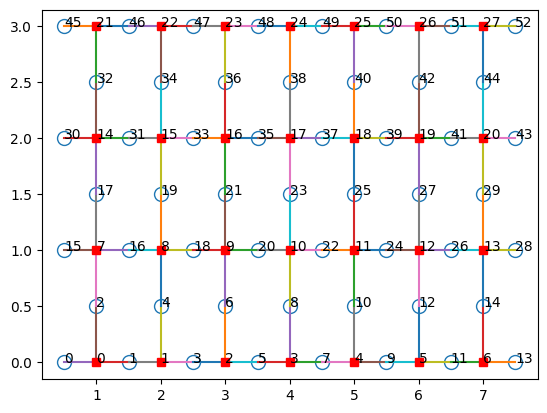

In [102]:
d = 4
dx = 2 * d 
dy = d 
# 2*i_x + i_y*2*dx
# 2*i_x + i_y*2*dx + 1 
# 2*(i_x+1) + i_y*2*dx
# 2*i_x + (i_y-1)*2*dx + 1
qubit_coords = []
for i_y in range(dy):
    for i_x in range(dx):
        if i_x ==0 or i_y == dy - 1:
            qubit_coords.append( ( i_x + 0.5, i_y ) )
        else:
            qubit_coords.append( ( i_x + 0.5, i_y ) )
            qubit_coords.append( ( i_x, i_y + 0.5 ) )

 
qubit_idx = {}
for idx, coords in enumerate(qubit_coords):
    qubit_idx[f"{coords}"] = idx

plotter(qubit_coords, color="C0")
# print(qubit_idx)

num_q = len(qubit_coords)
num_s = (dx-1) * dy
s_idx = 0
Smat = np.zeros(( num_s, num_q))
Smat_idx = {}
for i_y in range(dy):
    for i_x in range(1,dx):
        Smat_idx[f"({i_x}, {i_y})"] = s_idx
        if i_y == 0 :
            qvec = [(i_x + 0.5, i_y), (i_x - 0.5, i_y), (i_x, i_y + 0.5)]
            # smat.append(qvec)
        elif i_y == dy - 1 :
            qvec = [(i_x + 0.5, i_y), (i_x - 0.5, i_y), (i_x, i_y - 0.5)]
            # smat.append(qvec)
        else:
            qvec = [(i_x + 0.5, i_y), (i_x - 0.5, i_y), (i_x, i_y - 0.5), (i_x, i_y + 0.5)]
            # smat.append(qvec)
        for q in qvec:
            Smat[s_idx, qubit_idx[f"{q}"]] = 1
            plt.plot([i_x,q[0]],[i_y,q[1]])
        plt.plot(i_x,i_y, "rs")
        plt.text(i_x,i_y,s_idx)
        s_idx += 1

# for i in range(Smat.shape[0]):
#     print(i, np.argwhere(Smat[i,:])[:,0])
    
# print(qubit_idx)
# qubit_bdy = [qubit_idx[f"({d}, {i_y+0.5})"] for i_y in range(dy-1)]
qubit_bdy = [qubit_idx[f"({d+0.5}, {i_y})"] for i_y in range(dy)]
S_bdy = [Smat_idx[f"({d}, {i_y})"] for i_y in range(dy)]
print(qubit_bdy)
print(S_bdy)

qubit_logical = [qubit_idx[f"({0.5}, {i_y})"] for i_y in range(dy)]
print(qubit_logical)
logicals = np.zeros(num_q, dtype = np.uint8)
logicals[qubit_logical] = 1

In [10]:
def surface_code(d):
    dx = 2 * d 
    dy = d 

    qubit_coords = []
    for i_y in range(dy):
        for i_x in range(dx):
            if i_x ==0 or i_y == dy - 1:
                qubit_coords.append( ( i_x + 0.5, i_y ) )
            else:
                qubit_coords.append( ( i_x + 0.5, i_y ) )
                qubit_coords.append( ( i_x, i_y + 0.5 ) )

    
    qubit_idx = {}
    for idx, coords in enumerate(qubit_coords):
        qubit_idx[f"{coords}"] = idx

    # plotter(qubit_coords, color="C0")

    num_q = len(qubit_coords)
    num_s = (dx-1) * dy
    s_idx = 0
    Smat = np.zeros(( num_s, num_q))
    Smat_idx = {}
    for i_y in range(dy):
        for i_x in range(1,dx):
            Smat_idx[f"({i_x}, {i_y})"] = s_idx
            if i_y == 0 :
                qvec = [(i_x + 0.5, i_y), (i_x - 0.5, i_y), (i_x, i_y + 0.5)]
            elif i_y == dy - 1 :
                qvec = [(i_x + 0.5, i_y), (i_x - 0.5, i_y), (i_x, i_y - 0.5)]
            else:
                qvec = [(i_x + 0.5, i_y), (i_x - 0.5, i_y), (i_x, i_y - 0.5), (i_x, i_y + 0.5)]
            for q in qvec:
                Smat[s_idx, qubit_idx[f"{q}"]] = 1
            s_idx += 1

    qubit_bdy = [qubit_idx[f"({d+0.5}, {i_y})"] for i_y in range(dy)]
    S_bdy = [Smat_idx[f"({d}, {i_y})"] for i_y in range(dy)]
    bdy = qubit_bdy, S_bdy

    qubit_logical = [qubit_idx[f"({0.5}, {i_y})"] for i_y in range(dy)]
    logicals = np.zeros(num_q, dtype = np.uint8)
    logicals[qubit_logical] = 1

    return Smat, logicals, bdy

[14]
[14]


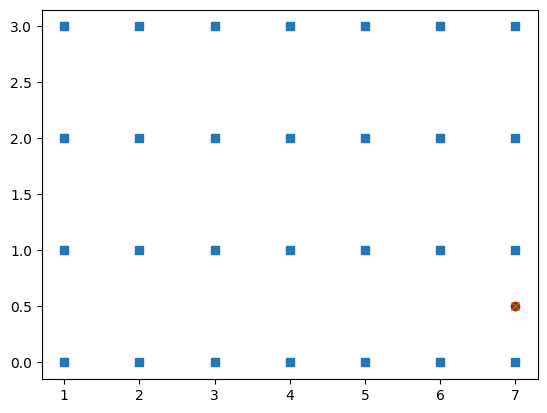

In [34]:
p_err =  0.08
weights = np.ones(num_q) * np.log((1-p_err)/p_err)
matching_x = Matching(Smat,spacelike_weights=weights)

for i_y in range(dy):
    for i_x in range(1,dx):
        plt.plot(i_x,i_y, "s", color = "C0")

# pauli = [0,1,2,3] # I X Z Y
# # err_instance = np.array(random.choices(pauli, [1-p_err,p_err/3,p_err/3,p_err/3], k=num_q))
# # x_err = np.argwhere(err_instance==1)[:,0]
err_inst = np.random.rand(num_q)
err_idx = np.argwhere( err_inst < 2*p_err/ 3 )[:,0]
for q in err_idx:
    plt.plot(qubit_coords[q][0],qubit_coords[q][1],"ro")
err_vec = np.zeros(num_q)
err_vec[err_idx] = 1
syndrome = (Smat@ err_vec) % 2
recovery_x = matching_x.decode(syndrome)

print(err_idx)
idx_recovery = np.argwhere(recovery_x>0)[:,0]

for q in idx_recovery:
    plt.plot(qubit_coords[q][0],qubit_coords[q][1],"x", color="C2")

print(idx_recovery)


In [23]:
# p_bulk_qubit = 0.05
p_bdy_qubit = 0.1
# p_qubit_list = np.ones(num_q) * p_bulk_qubit
# p_qubit_list[qubit_bdy] = p_bdy_qubit

harmonic = lambda k: (1/np.arange(1,k+1)).sum()
bandwidth = 4

p_bulk_s = 0.01
p_bdy_s = 0.02

dist_list = [4,6,8]
gen_coh_ratio_list = np.logspace(-3,-1,8)
Niter = 30000
num_errors = np.zeros((len(dist_list),len(gen_coh_ratio_list)))
for i_d, d in enumerate(dist_list):
    # print(d)

    tic = time.time()
    Smat, logicals, bdy = surface_code(d)
    num_s, num_q = Smat.shape
    qubit_bdy, S_bdy = bdy
    p_s_list = np.ones(num_s) * p_bulk_s
    p_s_list[S_bdy] = p_bdy_s

    repetitions = d

    for i_t, ratio in enumerate(gen_coh_ratio_list):
        # print(i_t)
        
        if d > bandwidth:
            idle_time = ((d // bandwidth) * harmonic(bandwidth)  + harmonic (d % bandwidth)  )* ratio
        else:
            idle_time = harmonic(d)* ratio
        p_bulk_qubit = 1 - np.exp(- idle_time )
        p_qubit_list = np.ones(num_q) * p_bulk_qubit
        p_qubit_list[qubit_bdy] = (p_bulk_qubit+ p_bdy_qubit)

        matching = Matching(Smat, spacelike_weights=np.log((1-p_qubit_list)/p_qubit_list),
                        repetitions=repetitions, timelike_weights=np.log((1-p_s_list)/p_s_list), faults_matrix=logicals)
        for _ in range(Niter):
            noise_new = (np.random.rand(num_q, repetitions) < np.reshape(p_qubit_list,(p_qubit_list.shape[0],1))).astype(np.uint8)
            noise_cumulative = (np.cumsum(noise_new, 1) % 2).astype(np.uint8)
            noise_total = noise_cumulative[:,-1]
            syndrome = Smat@noise_cumulative % 2
            syndrome_error = (np.random.rand(num_s, repetitions) < np.reshape(p_s_list,(p_s_list.shape[0],1)) ).astype(np.uint8)
            syndrome_error[:,-1] = 0 # Perfect measurements in last round to ensure even parity
            noisy_syndrome = (syndrome + syndrome_error) % 2
            # Convert to difference syndrome
            noisy_syndrome[:,1:] = (noisy_syndrome[:,1:] - noisy_syndrome[:,0:-1]) % 2
            # recovery_chain = matching.decode(noisy_syndrome)
            # print(num_q, num_s, recovery_chain.shape)
            predicted_logicals_flipped = matching.decode(noisy_syndrome)[0]
            actual_logicals_flipped = noise_total@logicals.T % 2
            num_errors[i_d,i_t] += not (predicted_logicals_flipped == actual_logicals_flipped)
    toc = time.time()
    print(f"d={d}, Time elapsed: {toc-tic:.2f} secs")
num_errors /= Niter
# print(num_errors)
# print(predicted_logicals_flipped, actual_logicals_flipped)

d=4, Time elapsed: 18.57 secs
d=6, Time elapsed: 38.05 secs
d=8, Time elapsed: 81.22 secs


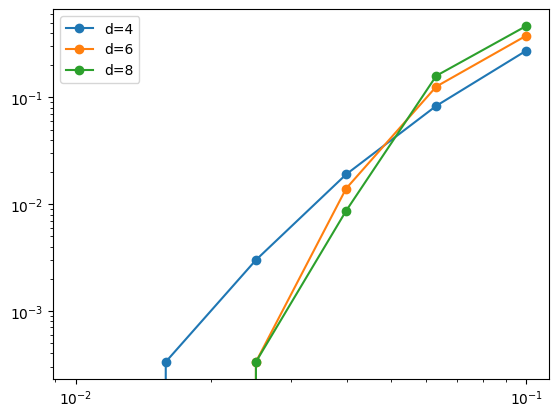

In [18]:
for i_d, d in enumerate(dist_list):
    plt.plot(gen_coh_ratio_list,num_errors[i_d,:],"o-",label=f"d={d}")
plt.legend()
plt.xscale("log")
plt.yscale("log")

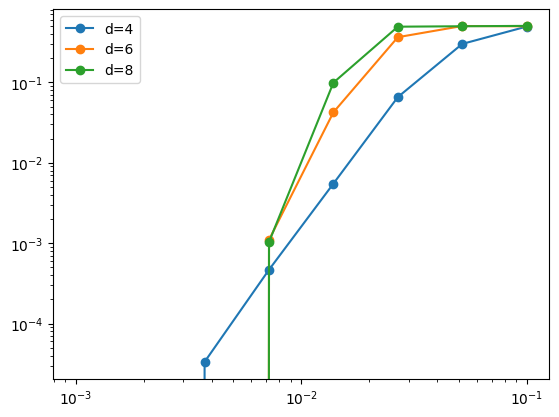

In [24]:
for i_d, d in enumerate(dist_list):
    plt.plot(gen_coh_ratio_list,num_errors[i_d,:],"o-",label=f"d={d}")
plt.legend()
plt.xscale("log")
plt.yscale("log")

In [48]:
a = np.random.rand(num_q, repetitions) 
print(a)
print(p_qubit_list)
print( (a<np.reshape(p_qubit_list,(p_qubit_list.shape[0],1))).astype(np.uint8) )


[[0.21586359 0.25375241]
 [0.73397014 0.38690216]
 [0.41792933 0.48780607]
 [0.48134557 0.0506389 ]
 [0.22758958 0.10321007]
 [0.9523039  0.48254653]
 [0.77519422 0.89555984]
 [0.97484912 0.11281504]
 [0.92423149 0.81562444]
 [0.03638088 0.20432852]
 [0.23328203 0.2187781 ]]
[0.1 0.1 0.1 0.1 0.5 0.1 0.1 0.1 0.1 0.1 0.1]
[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]]
